## Using Code From Wine Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Wine.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
mean=np.mean(X_train,axis=0)

Cx=np.matmul((X_train-mean).T,(X_train-mean))
Cx=np.cov((X_train-mean).T)

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(Cx)
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i]) for i in range(len(eig_vals))]
eig_pairs=sorted(eig_pairs,key=lambda k:k[0],reverse=True)
W=np.hstack((eig_pairs[0][1].reshape(13,1),eig_pairs[1][1].reshape(13,1)))

X_new=np.dot(X_train,W)

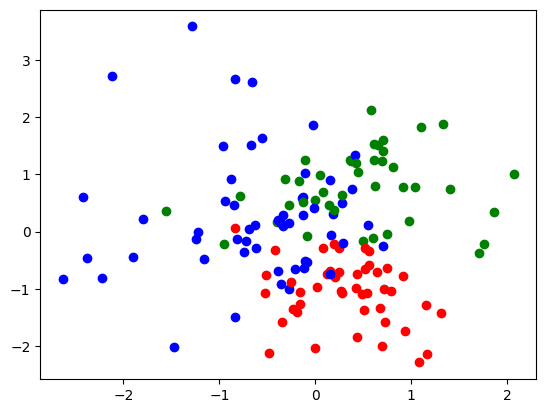

In [ ]:
clr=['red','blue','green']
for i in range(X_new.shape[0]):
    plt.scatter(X_new[i,0],X_new[i,1],c=clr[y_train[i]-1])
plt.show()

## Using creditcard Dataset

### Library & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
# Load the dataset
dataset = pd.read_csv('creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

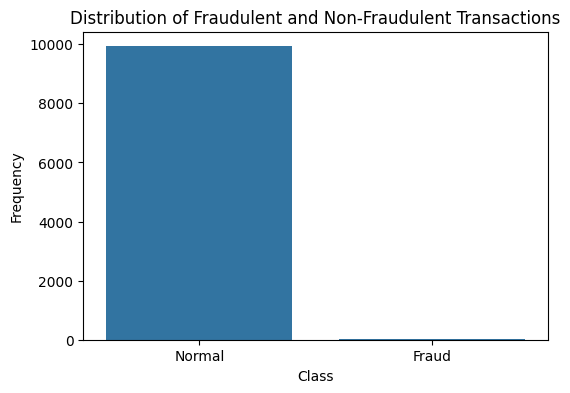

In [ ]:
# Distribution of the Class Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=dataset)
plt.xticks([0, 1], ["Normal", "Fraud"])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

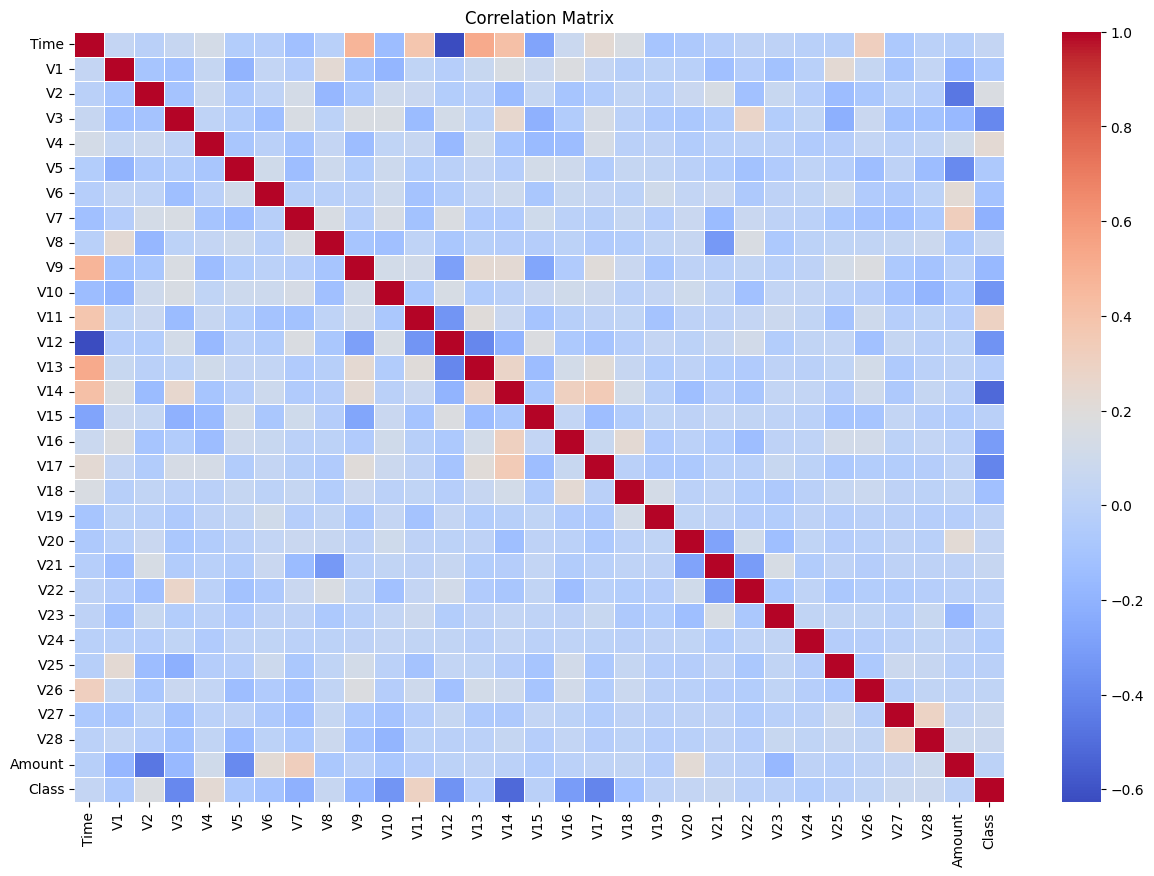

In [ ]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

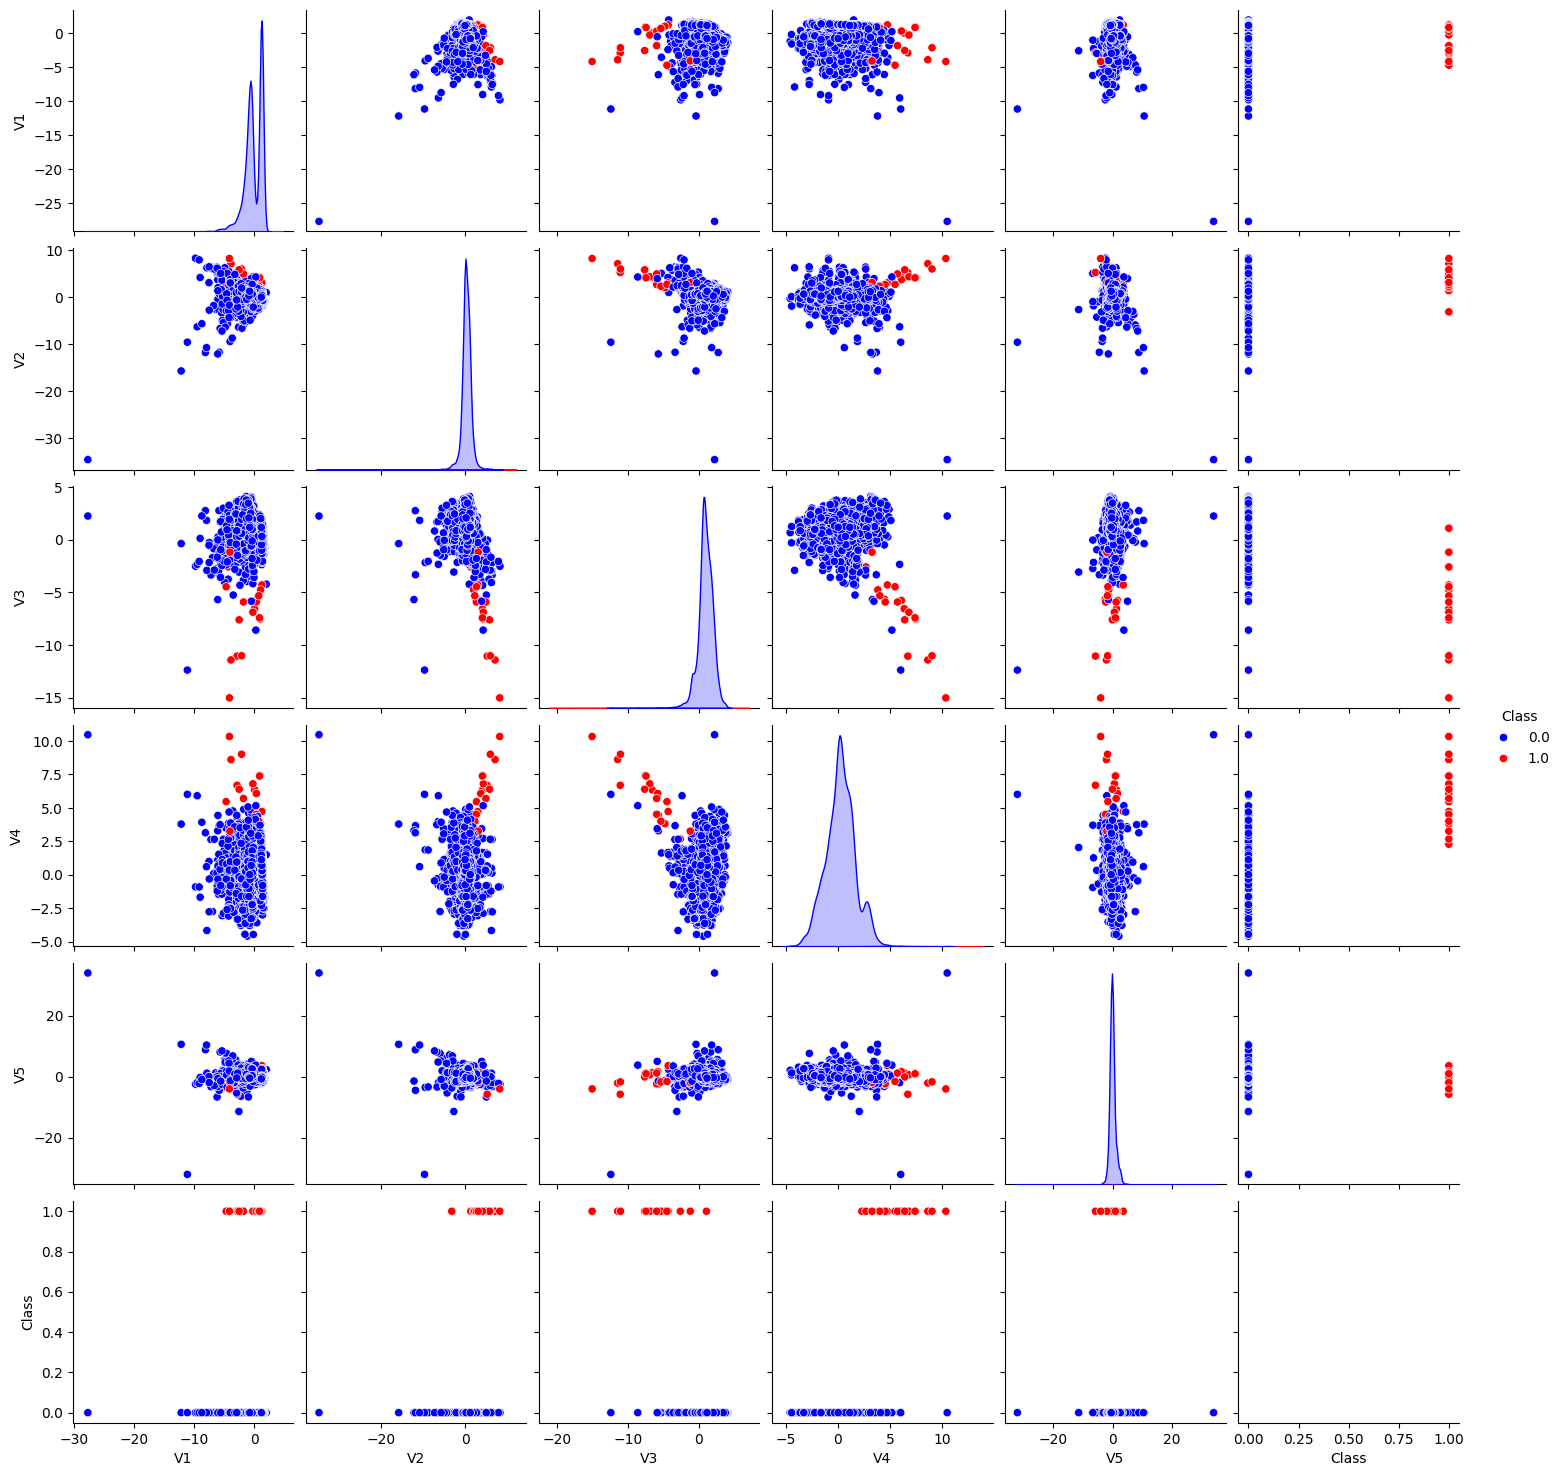

In [ ]:
# Pairplot of a subset of features to visualize the class separation
subset = dataset.sample(n=5000, random_state=42)  # Using a subset for pairplot due to its high computational cost
sns.pairplot(subset, vars=['V1', 'V2', 'V3', 'V4', 'V5', 'Class'], hue='Class', palette={0: 'blue', 1: 'red'}, diag_kind='kde')
plt.show()

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
# Check for null values
null_values = dataset.isnull().sum()

# Check the distribution of the target variable
print(dataset['Class'].value_counts())

# Print the count of null values for each column
print(null_values)

# Check if there are any null values in the entire dataset
if null_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

Class
0.0    9926
1.0      38
Name: count, dtype: int64
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
There are missing values in the dataset.


### Extract features, target variable and Splitting Dataset

In [ ]:
# Extract features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Ensure there are no infinite values in X and no NaN values in y
X = np.nan_to_num(X, nan=0.0, posinf=None, neginf=None)
y = np.nan_to_num(y, nan=0.0).astype(int)  # Convert y to integer type

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Combine train and test sets to apply LDA on the entire dataset
X_scaled = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [ ]:
# Calculate the mean of each feature
mean_vector = np.mean(X_train, axis=0)

# Center the data by subtracting the mean
centered_data = X_train - mean_vector

# Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00012545e+00  4.29274455e-02 -6.52197005e-03  5.51923910e-02
   1.29654676e-01 -4.55430654e-02 -1.71789009e-02 -1.23529299e-01
  -5.61585180e-03  4.67775210e-01 -1.50772927e-01  3.83175361e-01
  -6.31161771e-01  5.16091834e-01  4.10873093e-01 -2.74619806e-01
   7.40163960e-02  2.27047930e-01  1.58483191e-01 -9.54075605e-02
  -6.05750624e-02 -2.40008158e-02  1.01280601e-02  1.53013177e-02
  -1.31381342e-02 -2.52070942e-02  3.21148701e-01 -6.78767477e-02
   6.17618232e-03 -1.14393534e-02]
 [ 4.29274455e-02  1.00012545e+00 -1.45456475e-01 -1.20000480e-01
   5.98606604e-02 -1.43923519e-01  9.93968325e-03 -6.62735146e-02
   2.34020897e-01 -9.49455955e-02 -1.56465917e-01  2.63453544e-02
  -2.16974937e-02  7.03733462e-02  1.50796504e-01  9.23025295e-02
   1.60310077e-01  4.66980590e-02 -3.48433952e-02  5.57480538e-03
  -3.61064435e-03 -1.21022819e-01 -5.05463241e-02 -1.74974578e-01
  -1.34623605e-02  2.17046189e-01  4.43462657e-02 -6.20811751e-02
   1.66313351e-02 -1.7

### PCA & LDA

In [ ]:
### PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y_combined

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of the principal components:")
print(explained_variance)

Explained variance ratio of the principal components:
[0.10357681 0.06792513]


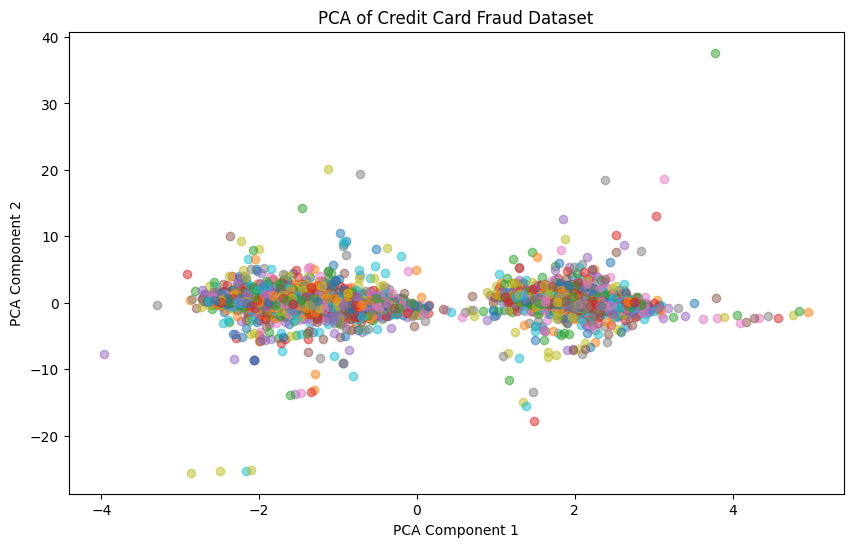

In [ ]:
# Plot PCA results
plt.figure(figsize=(10, 6))
for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Credit Card Fraud Dataset')
plt.show()

In [ ]:
# Combine train and test sets to apply LDA on the entire dataset
X_scaled = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_components = lda.fit_transform(X_scaled, y_combined)

# Create a DataFrame with the LDA components
lda_df = pd.DataFrame(lda_components, columns=['LDA1'])
lda_df['Class'] = y_combined

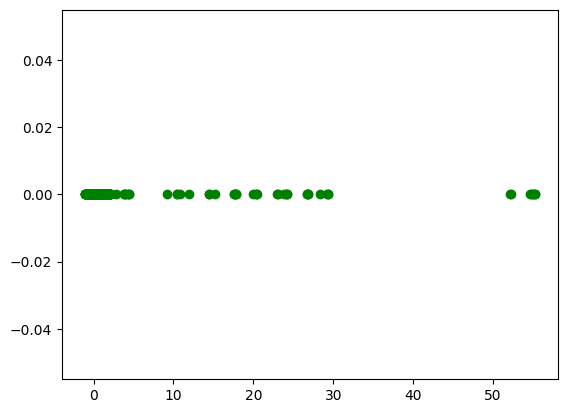

In [ ]:
clr=['red','blue','green']
for i in range(lda_components.shape[0]):
    plt.scatter(lda_components[i,0], 0, c=clr[y[i]-1])
plt.show()

### Covarience Matrix

In [ ]:
# Calculate the mean of each feature
mean_vector = np.mean(X_train, axis=0)

# Center the data by subtracting the mean
centered_data = X_train - mean_vector

# Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00012545e+00  4.29274455e-02 -6.52197005e-03  5.51923910e-02
   1.29654676e-01 -4.55430654e-02 -1.71789009e-02 -1.23529299e-01
  -5.61585180e-03  4.67775210e-01 -1.50772927e-01  3.83175361e-01
  -6.31161771e-01  5.16091834e-01  4.10873093e-01 -2.74619806e-01
   7.40163960e-02  2.27047930e-01  1.58483191e-01 -9.54075605e-02
  -6.05750624e-02 -2.40008158e-02  1.01280601e-02  1.53013177e-02
  -1.31381342e-02 -2.52070942e-02  3.21148701e-01 -6.78767477e-02
   6.17618232e-03 -1.14393534e-02]
 [ 4.29274455e-02  1.00012545e+00 -1.45456475e-01 -1.20000480e-01
   5.98606604e-02 -1.43923519e-01  9.93968325e-03 -6.62735146e-02
   2.34020897e-01 -9.49455955e-02 -1.56465917e-01  2.63453544e-02
  -2.16974937e-02  7.03733462e-02  1.50796504e-01  9.23025295e-02
   1.60310077e-01  4.66980590e-02 -3.48433952e-02  5.57480538e-03
  -3.61064435e-03 -1.21022819e-01 -5.05463241e-02 -1.74974578e-01
  -1.34623605e-02  2.17046189e-01  4.43462657e-02 -6.20811751e-02
   1.66313351e-02 -1.7

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of the principal components:")
print(explained_variance)

Explained variance ratio of the principal components:
[0.10357679 0.06792517]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

def train_and_evaluate(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    results = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred_proba),
        "y_test": y_test,
        "y_pred_proba": y_pred_proba
    }

    return results

In [ ]:
# PCA
pca_results = train_and_evaluate(pca_df.drop(columns=['Class']), pca_df['Class'])
print("PCA Results:")
print(pca_results["Classification Report"])

# LDA
lda_results = train_and_evaluate(lda_df.drop(columns=['Class']), lda_df['Class'])
print("\nLDA Results:")
print(lda_results["Classification Report"])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2979
           1       0.00      0.00      0.00        11

    accuracy                           1.00      2990
   macro avg       0.50      0.50      0.50      2990
weighted avg       0.99      1.00      0.99      2990


LDA Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2979
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2990
   macro avg       1.00      0.95      0.98      2990
weighted avg       1.00      1.00      1.00      2990



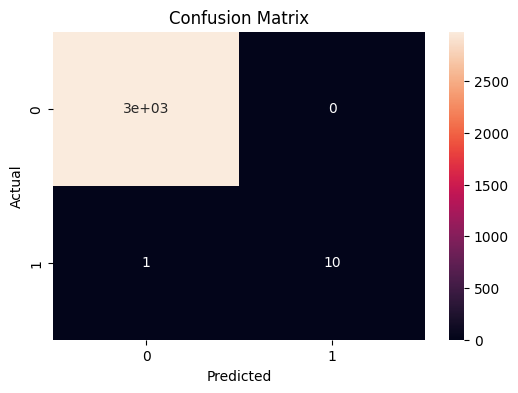

In [ ]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(lda_results["Confusion Matrix"])